In [1]:
!pip install dash
!pip install dash-bootstrap-components
!pip install plotly



In [2]:
!pip install dash-bootstrap-components

In [5]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 加载数据集并预处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 计算全局解释
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# 绘制全局SHAP特征重要性图
shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [6]:
print("shap_values shape:", shap_values.shape)
print("X_test shape:", X_test.shape)


shap_values shape: (2165, 7, 2)
X_test shape: (2165, 7)


In [ ]:
# 假设你要绘制第一个类别的 SHAP 值
shap.summary_plot(shap_values[:, :, 0], X_test, feature_names=X_test.columns)


In [ ]:
# 绘制第二个类别的 SHAP 值
shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X_test.columns)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# 删除缺失值
compas_df = compas_df.dropna()

# 将类别特征编码为数值
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['race'] = le.fit_transform(compas_df['race'])
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# 将数据集拆分为特征和目标变量
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 初始化并训练决策树模型
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# 预测并计算准确率
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的准确率: {accuracy:.2f}")


模型的准确率: 0.69


In [ ]:
import graphviz
from sklearn.tree import export_graphviz

# 导出为 Graphviz 格式
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No Recid', 'Recid'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("compas_decision_tree")  # 将结果保存为文件
graph.view()


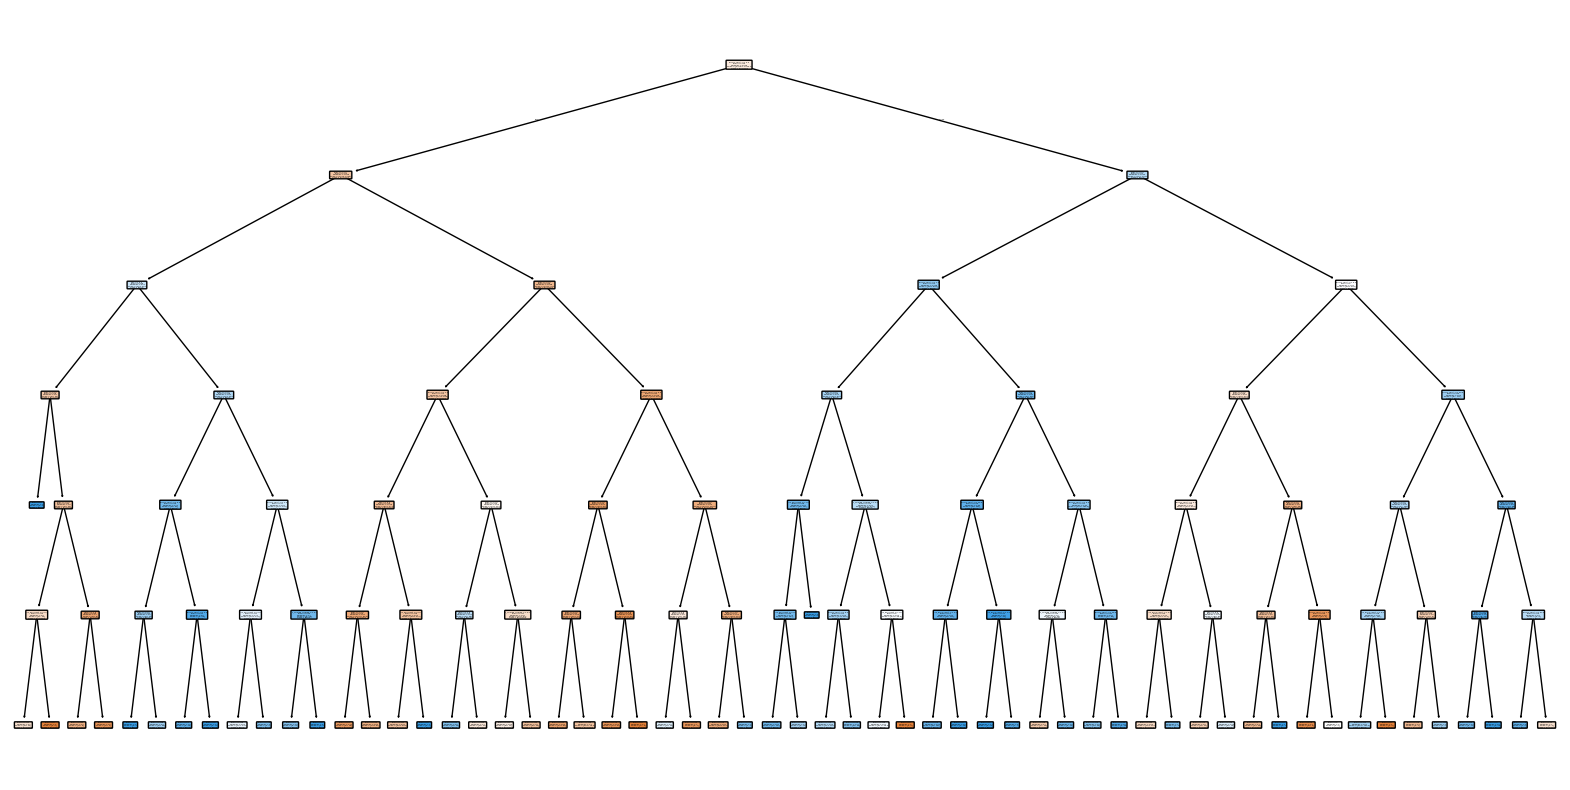

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 使用 matplotlib 绘制决策树
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No Recid', 'Recid'], filled=True, rounded=True)
plt.show()


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# 删除缺失值
compas_df = compas_df.dropna()

# 仅保留非裔和白人，去掉西班牙裔和其他种族
compas_df = compas_df[compas_df['race'].isin(['African-American', 'Caucasian'])]

# 将 'race' 列重新编码为两类：非裔（1）及白人（0）
compas_df['race'] = compas_df['race'].apply(lambda x: 1 if x == 'African-American' else 0)

# 将类别特征编码为数值
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# 将数据集拆分为特征和目标变量
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 初始化并训练决策树模型
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# 预测并计算准确率
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的准确率: {accuracy:.2f}")

import graphviz
from sklearn.tree import export_graphviz

# 导出为 Graphviz 格式
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['No Recid', 'Recid'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("compas_decision_tree_race")  # 将结果保存为文件
graph.view()


模型的准确率: 0.68


'compas_decision_tree_race.pdf'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# 删除缺失值
compas_df = compas_df.dropna()

# 将类别特征编码为数值
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['race'] = le.fit_transform(compas_df['race'])  # 假设race中 '2' 是非裔，'1' 是白人
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# 将数据集拆分为特征和目标变量
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化并训练决策树模型
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# 找到一条犯罪的非裔美国人数据
african_american_sample = X_test[(X_test['race'] == 2) & (y_test == 1)].iloc[0]
print("非裔美国人样本及其特征：")
print(african_american_sample)

# 显示其预测结果
original_prediction = clf.predict([african_american_sample])[0]
print(f"非裔美国人样本的预测结果: {'Recid' if original_prediction == 1 else 'No Recid'}")

# 手动更改该样本中的种族为白人
modified_sample = african_american_sample.copy()
modified_sample['race'] = 1  # 假设 '1' 是白人
print("\n修改后（种族为白人）的样本及其特征：")
print(modified_sample)

# 显示更改后的预测结果
modified_prediction = clf.predict([modified_sample])[0]
print(f"修改后（种族为白人）的预测结果: {'Recid' if modified_prediction == 1 else 'No Recid'}")



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
import graphviz

# 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# 删除缺失值
compas_df = compas_df.dropna()

# 将类别特征编码为数值
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['race'] = le.fit_transform(compas_df['race'])  # 假设 '2' 是非裔，'1' 是白人
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# 将数据集拆分为特征和目标变量
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化并训练决策树模型
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# 随机抽取30条非裔美国人数据
african_american_samples = X_test[X_test['race'] == 2].sample(n=30, random_state=42)
print("随机抽取的30条非裔美国人样本：")
print(african_american_samples)

# 统计预测结果发生变化的样本及其详细特征
changed_samples = []

for i, sample in african_american_samples.iterrows():
    # 原始预测
    original_prediction = clf.predict([sample])[0]
    
    # 修改种族为白人
    modified_sample = sample.copy()
    modified_sample['race'] = 1  # 假设 '1' 是白人
    
    # 修改后预测
    modified_prediction = clf.predict([modified_sample])[0]
    
    # 比较预测结果是否发生改变
    if original_prediction != modified_prediction:
        changed_samples.append((i, sample, original_prediction, modified_prediction))

# 打印发生变化的样本及其详细特征
print("\n发生预测结果变化的样本详情：")
for idx, sample, original_pred, modified_pred in changed_samples:
    print(f"索引: {idx}")
    print(sample)
    print(f"原始预测: {original_pred}, 修改种族后预测: {modified_pred}")
    print("-" * 50)



随机抽取的30条非裔美国人样本：
      age  sex  race  juv_fel_count  juv_misd_count  priors_count  \
6792   36    1     2              0               0             1   
4601   28    1     2              0               0             2   
5054   45    1     2              0               0             2   
7031   26    1     2              0               0             1   
4766   46    0     2              0               0             0   
1811   23    1     2              0               0             2   
6845   41    1     2              0               0             3   
2022   33    0     2              0               0             1   
2921   64    1     2              0               0             8   
6747   23    1     2              0               0             1   
1009   60    1     2              0               0             1   
548    23    1     2              0               0             2   
1121   27    1     2              0               0             1   
6182   52    1   

/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature nam

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
import graphviz

# Load the COMPAS dataset
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# Select relevant features and retain 'two_year_recid' as the target variable
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# Drop missing values
compas_df = compas_df.dropna()

# Encode categorical features as numerical values
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['race'] = le.fit_transform(compas_df['race'])  # Assuming '2' is African-American, '1' is Caucasian
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# Split the dataset into features and target variable
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree model
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Randomly sample 30 African-American individuals
african_american_samples = X_test[X_test['race'] == 2].sample(n=30, random_state=42)
print("Randomly sampled 30 African-American individuals:")
print(african_american_samples)

# Track samples where the prediction changes after modifying the race
changed_samples = []

for i, sample in african_american_samples.iterrows():
    # Original prediction
    original_prediction = clf.predict([sample])[0]
    
    # Modify the race to Caucasian
    modified_sample = sample.copy()
    modified_sample['race'] = 1  # Assuming '1' is Caucasian
    
    # Prediction after race modification
    modified_prediction = clf.predict([modified_sample])[0]
    
    # Compare whether the prediction changes
    if original_prediction != modified_prediction:
        changed_samples.append((i, sample, modified_sample, original_prediction, modified_prediction))

# Print the details of samples where the prediction changed
print("\nDetails of samples where prediction changed:")
for idx, original_sample, modified_sample, original_pred, modified_pred in changed_samples:
    print(f"Index: {idx}")
    print("Original features:")
    print(original_sample)
    print(f"Original prediction: {original_pred}")
    print("\nModified features:")
    print(modified_sample)
    print(f"Prediction after race modification: {modified_pred}")
    print("-" * 50)


Randomly sampled 30 African-American individuals:
      age  sex  race  juv_fel_count  juv_misd_count  priors_count  \
6792   36    1     2              0               0             1   
4601   28    1     2              0               0             2   
5054   45    1     2              0               0             2   
7031   26    1     2              0               0             1   
4766   46    0     2              0               0             0   
1811   23    1     2              0               0             2   
6845   41    1     2              0               0             3   
2022   33    0     2              0               0             1   
2921   64    1     2              0               0             8   
6747   23    1     2              0               0             1   
1009   60    1     2              0               0             1   
548    23    1     2              0               0             2   
1121   27    1     2              0               0  

/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/huashenglong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature nam

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
import graphviz

# Load COMPAS dataset
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# Select relevant features and retain 'two_year_recid' as the target variable
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# Drop missing values
compas_df = compas_df.dropna()

# Encode categorical features as numbers
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['race'] = le.fit_transform(compas_df['race'])  # Assuming '2' represents African-American, '1' represents Caucasian
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# Split the dataset into features and target variable
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree model
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Randomly select 30 African-American samples
african_american_samples = X_test[X_test['race'] == 2].sample(n=30, random_state=42)
print("Randomly selected 30 African-American samples:")
print(african_american_samples)

# Track samples with prediction changes after race modification
changed_samples = []

for i, sample in african_american_samples.iterrows():
    # Ensure sample is a DataFrame with the correct feature names
    sample_df = pd.DataFrame([sample], columns=X_test.columns)
    
    # Original prediction
    original_prediction = clf.predict(sample_df)[0]
    
    # Modify race to Caucasian
    modified_sample = sample.copy()
    modified_sample['race'] = 1  # Assuming '1' is Caucasian
    modified_sample_df = pd.DataFrame([modified_sample], columns=X_test.columns)
    
    # Modified prediction
    modified_prediction = clf.predict(modified_sample_df)[0]
    
    # Compare predictions to check if they change
    if original_prediction != modified_prediction:
        changed_samples.append((i, sample, original_prediction, modified_prediction))

# Print details of samples with changed predictions
print("\nDetails of samples with changed predictions:")
for idx, sample, original_pred, modified_pred in changed_samples:
    print(f"Index: {idx}")
    print(sample)
    print(f"Original prediction: {original_pred}, Prediction after race modification: {modified_pred}")
    print("-" * 50)


In [9]:
pip install dice-ml


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scikit-learn pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


Demographic Parity Difference (Baseline): 0.0877
Equalized Odds Difference (Baseline): 0.3908

--- Factor = 0.0 ---
Demographic Parity Difference (Augmented): 0.0877
Equalized Odds Difference (Augmented): 0.3908

--- Factor = 0.1 ---
Demographic Parity Difference (Augmented): 0.0877
Equalized Odds Difference (Augmented): 0.3887

--- Factor = 0.2 ---
Demographic Parity Difference (Augmented): 0.2067
Equalized Odds Difference (Augmented): 0.5611

--- Factor = 0.3 ---
Demographic Parity Difference (Augmented): 0.2432
Equalized Odds Difference (Augmented): 0.6071

--- Factor = 0.4 ---
Demographic Parity Difference (Augmented): 0.0757
Equalized Odds Difference (Augmented): 0.3929

--- Factor = 0.5 ---
Demographic Parity Difference (Augmented): 0.0757
Equalized Odds Difference (Augmented): 0.3856

--- Factor = 0.6 ---
Demographic Parity Difference (Augmented): 0.1136
Equalized Odds Difference (Augmented): 0.3542

--- Factor = 0.7 ---
Demographic Parity Difference (Augmented): 0.2511
Equalize

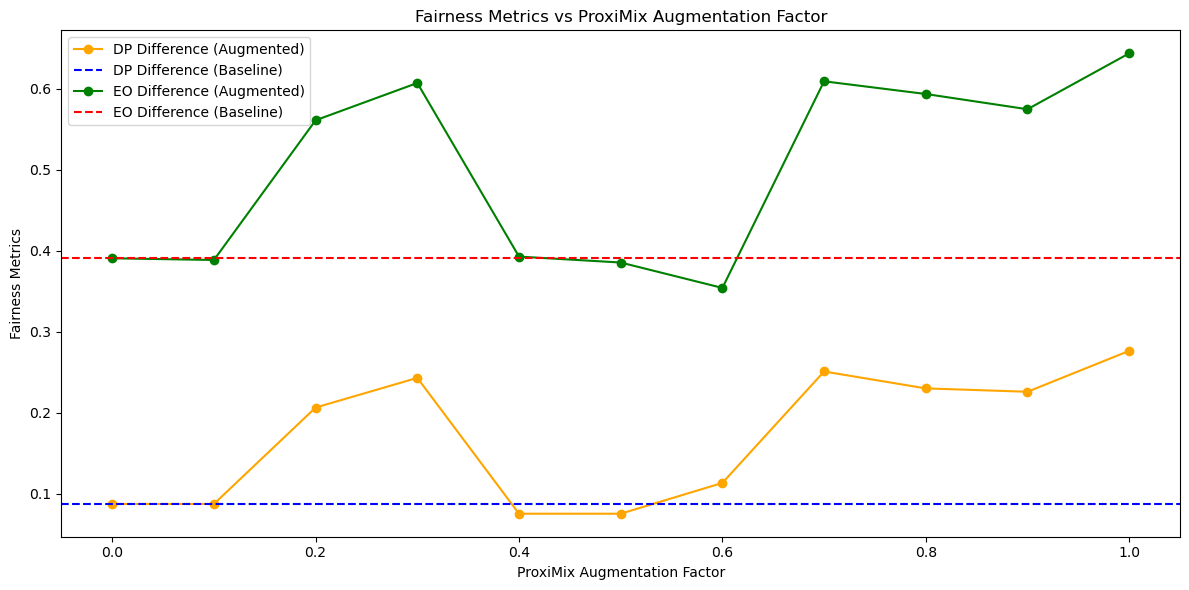

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import NearestNeighbors
from fairlearn.metrics import demographic_parity_difference
import matplotlib.pyplot as plt

# ProxiMix 数据增强方法
def proxi_mix(X, y, k=3, d=1.0, factor=0.5, max_samples=None):
    """
    ProxiMix 数据增强方法，限制生成样本数量，max_samples 乘以 factor 以控制生成数量
    """
    nn = NearestNeighbors(n_neighbors=k+1)  # 找到 k+1 个邻居，其中第一个是样本自身
    nn.fit(X)
    distances, indices = nn.kneighbors(X)
    
    new_X = []
    new_y = []
    cnt = 0  # 初始化样本计数器
    
    # 动态调整最大生成样本数量
    if max_samples is None:
        max_samples = len(X)  # 如果未指定最大样本数，则默认为原始样本数量的一倍
    max_samples = max(1, int(max_samples * factor))  # 确保至少生成一个样本
    
    for i in range(len(X)):
        if cnt >= max_samples:  # 如果样本数量达到上限，提前停止
            break
        # 移除自身作为邻居（从第一个索引开始），所以从 indices[i][1:] 开始
        for j in range(1, k+1):  # 选择邻居，从 indices[i][1] 开始，跳过 indices[i][0] 即自身
            if cnt >= max_samples:  # 再次检查是否达到最大样本数
                break
            lam = np.random.beta(d, d)
            new_sample = lam * X[i] + (1 - lam) * X[indices[i][j]]
            new_label = int(round(lam * y[i] + (1 - lam) * y[indices[i][j]]))
            new_X.append(new_sample)
            new_y.append(new_label)
            cnt += 1  # 更新计数器
        if cnt >= max_samples:  # 再次检查是否达到最大样本数
            break
    
    return np.array(new_X), np.array(new_y)

# 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree']
target = 'two_year_recid'
compas_df = compas_df[features + [target]].dropna()

# 类别特征编码为数值
compas_df = pd.get_dummies(compas_df, columns=['sex', 'race', 'c_charge_degree'], drop_first=True)

# 数据集拆分为训练集和测试集
X = compas_df.drop(columns=[target])
y = compas_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 设置最大生成样本数：原始数据集5000条，不超过一倍，因此最多生成5000条新样本
max_generated_samples = 5000

# 训练并评估基准模型（未使用 ProxiMix 增强）
clf_baseline = DecisionTreeClassifier(max_depth=6, random_state=42)
clf_baseline.fit(X_train, y_train)
y_pred_baseline = clf_baseline.predict(X_test)

# 计算并打印基准模型的公平性指标
race_column = [col for col in X_test.columns if 'race_' in col][0]
dp_diff_baseline_value = demographic_parity_difference(y_test, y_pred_baseline, sensitive_features=X_test[race_column])

print(f"Demographic Parity Difference (Baseline): {dp_diff_baseline_value:.4f}")

# 用于绘图的数据存储
factors = []
dp_diff_augmented_list = []

# 循环 factor 从 0 到 1，间隔为 0.1
for factor in np.arange(0.0, 1.1, 0.1):
    print(f"\n--- Factor = {factor:.1f} ---")

    # 使用 ProxiMix 增强数据，限制最大生成样本数量
    X_new, y_new = proxi_mix(X_train.values, y_train.values, k=3, d=1.0, factor=factor, max_samples=max_generated_samples)
    
    # 检查是否生成了样本
    if X_new.size > 0:
        # 将原始训练集与增强样本合并
        augmented_X_train = pd.DataFrame(np.vstack([X_train.values, X_new]), columns=X_train.columns)
        augmented_y_train = pd.Series(np.hstack([y_train.values, y_new]))

        # 训练增强模型
        clf_augmented = DecisionTreeClassifier(max_depth=6, random_state=42)
        clf_augmented.fit(augmented_X_train, augmented_y_train)
        
        # 预测并评估增强模型的公平性指标
        y_pred_augmented = clf_augmented.predict(X_test)
        
        dp_diff_augmented_value = demographic_parity_difference(y_test, y_pred_augmented, sensitive_features=X_test[race_column])
        
        # 保存数据用于绘图
        factors.append(factor)
        dp_diff_augmented_list.append(dp_diff_augmented_value)
        
        # 打印增强模型的公平性指标
        print(f"Demographic Parity Difference (Augmented): {dp_diff_augmented_value:.4f}")
    else:
        print("No new samples were generated.")

# 绘制 Demographic Parity Difference 随 factor 变化的折线图
plt.figure(figsize=(12, 6))

# Demographic Parity Difference 曲线
plt.plot(factors, dp_diff_augmented_list, label='DP Difference (Augmented)', marker='o', color='orange')
plt.axhline(y=dp_diff_baseline_value, color='blue', linestyle='--', label='DP Difference (Baseline)')

plt.xlabel('ProxiMix Augmentation Factor')
plt.ylabel('Demographic Parity Difference')
plt.title('Demographic Parity Difference vs ProxiMix Augmentation Factor')
plt.legend()
plt.tight_layout()
plt.show()


Demographic Parity Difference (Baseline): 0.0877

--- Factor = 0.0 ---
Demographic Parity Difference (Augmented): 0.0877

--- Factor = 0.1 ---
Demographic Parity Difference (Augmented): 0.0863

--- Factor = 0.2 ---
Demographic Parity Difference (Augmented): 0.2182

--- Factor = 0.3 ---
Demographic Parity Difference (Augmented): 0.2196

--- Factor = 0.4 ---
Demographic Parity Difference (Augmented): 0.0395

--- Factor = 0.5 ---
Demographic Parity Difference (Augmented): 0.0627

--- Factor = 0.6 ---
Demographic Parity Difference (Augmented): 0.0854

--- Factor = 0.7 ---
Demographic Parity Difference (Augmented): 0.0673

--- Factor = 0.8 ---
Demographic Parity Difference (Augmented): 0.0701

--- Factor = 0.9 ---
Demographic Parity Difference (Augmented): 0.0553

--- Factor = 1.0 ---
Demographic Parity Difference (Augmented): 0.0724


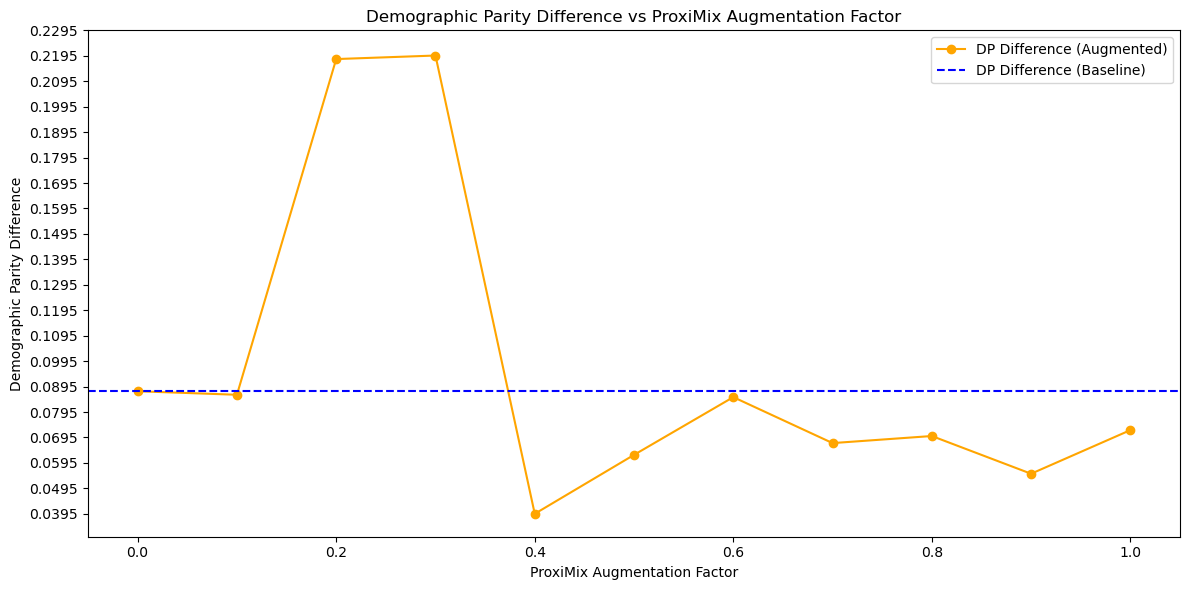

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import NearestNeighbors
from fairlearn.metrics import demographic_parity_difference
import matplotlib.pyplot as plt

# 设置全局随机种子
np.random.seed(32)

# ProxiMix 数据增强方法
def proxi_mix(X, y, k=3, d=1.0, factor=0.5, max_samples=None, random_seed=None):
    """
    ProxiMix 数据增强方法，限制生成样本数量，max_samples 乘以 factor 以控制生成数量
    """
    if random_seed is not None:
        np.random.seed(random_seed)  # 设置随机种子

    nn = NearestNeighbors(n_neighbors=k+1)  # 找到 k+1 个邻居，其中第一个是样本自身
    nn.fit(X)
    distances, indices = nn.kneighbors(X)
    
    new_X = []
    new_y = []
    cnt = 0  # 初始化样本计数器
    
    # 动态调整最大生成样本数量
    if max_samples is None:
        max_samples = len(X)  # 如果未指定最大样本数，则默认为原始样本数量的一倍
    max_samples = max(1, int(max_samples * factor))  # 确保至少生成一个样本
    
    for i in range(len(X)):
        if cnt >= max_samples:  # 如果样本数量达到上限，提前停止
            break
        # 移除自身作为邻居（从第一个索引开始），所以从 indices[i][1:] 开始
        for j in range(1, k+1):  # 选择邻居，从 indices[i][1] 开始，跳过 indices[i][0] 即自身
            if cnt >= max_samples:  # 再次检查是否达到最大样本数
                break
            lam = np.random.beta(d, d)
            new_sample = lam * X[i] + (1 - lam) * X[indices[i][j]]
            new_label = int(round(lam * y[i] + (1 - lam) * y[indices[i][j]]))
            new_X.append(new_sample)
            new_y.append(new_label)
            cnt += 1  # 更新计数器
        if cnt >= max_samples:  # 再次检查是否达到最大样本数
            break
    
    return np.array(new_X), np.array(new_y)

# 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree']
target = 'two_year_recid'
compas_df = compas_df[features + [target]].dropna()

# 类别特征编码为数值
compas_df = pd.get_dummies(compas_df, columns=['sex', 'race', 'c_charge_degree'], drop_first=True)

# 数据集拆分为训练集和测试集
X = compas_df.drop(columns=[target])
y = compas_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练并评估基准模型（未使用 ProxiMix 增强）
clf_baseline = DecisionTreeClassifier(max_depth=6, random_state=42)
clf_baseline.fit(X_train, y_train)
y_pred_baseline = clf_baseline.predict(X_test)

# 计算并打印基准模型的公平性指标
race_column = [col for col in X_test.columns if 'race_' in col][0]
dp_diff_baseline_value = demographic_parity_difference(y_test, y_pred_baseline, sensitive_features=X_test[race_column])

print(f"Demographic Parity Difference (Baseline): {dp_diff_baseline_value:.4f}")

# 用于绘图的数据存储
factors = []
dp_diff_augmented_list = []

# 循环 factor 从 0 到 1，间隔为 0.1
for factor in np.arange(0.0, 1.1, 0.1):
    print(f"\n--- Factor = {factor:.1f} ---")

    # 使用 ProxiMix 增强数据，去掉最大生成样本数限制，设定随机种子
    X_new, y_new = proxi_mix(X_train.values, y_train.values, k=3, d=1.0, factor=factor, max_samples=None, random_seed=32)
    
    # 检查是否生成了样本
    if X_new.size > 0:
        # 将原始训练集与增强样本合并
        augmented_X_train = pd.DataFrame(np.vstack([X_train.values, X_new]), columns=X_train.columns)
        augmented_y_train = pd.Series(np.hstack([y_train.values, y_new]))

        # 训练增强模型
        clf_augmented = DecisionTreeClassifier(max_depth=6, random_state=42)
        clf_augmented.fit(augmented_X_train, augmented_y_train)
        
        # 预测并评估增强模型的公平性指标
        y_pred_augmented = clf_augmented.predict(X_test)
        
        dp_diff_augmented_value = demographic_parity_difference(y_test, y_pred_augmented, sensitive_features=X_test[race_column])
        
        # 保存数据用于绘图
        factors.append(factor)
        dp_diff_augmented_list.append(dp_diff_augmented_value)
        
        # 打印增强模型的公平性指标
        print(f"Demographic Parity Difference (Augmented): {dp_diff_augmented_value:.4f}")
    else:
        print("No new samples were generated.")

# 绘制 Demographic Parity Difference 随 factor 变化的折线图
plt.figure(figsize=(12, 6))

# Demographic Parity Difference 曲线
plt.plot(factors, dp_diff_augmented_list, label='DP Difference (Augmented)', marker='o', color='orange')
plt.axhline(y=dp_diff_baseline_value, color='blue', linestyle='--', label='DP Difference (Baseline)')

# 设置纵坐标的刻度细化
plt.yticks(np.arange(min(dp_diff_augmented_list + [dp_diff_baseline_value]), max(dp_diff_augmented_list + [dp_diff_baseline_value]) + 0.01, 0.01))

plt.xlabel('ProxiMix Augmentation Factor')
plt.ylabel('Demographic Parity Difference')
plt.title('Demographic Parity Difference vs ProxiMix Augmentation Factor')
plt.legend()
plt.tight_layout()
plt.show()


In [110]:
print(X_new.shape)

(5049, 11)


Demographic Parity Difference (Baseline): 0.2220

--- Factor = 0.0 ---
Demographic Parity Difference (Augmented): 0.2316

--- Factor = 0.1 ---
Demographic Parity Difference (Augmented): 0.2187

--- Factor = 0.2 ---
Demographic Parity Difference (Augmented): 0.2230

--- Factor = 0.3 ---
Demographic Parity Difference (Augmented): 0.2343

--- Factor = 0.4 ---
Demographic Parity Difference (Augmented): 0.2514

--- Factor = 0.5 ---
Demographic Parity Difference (Augmented): 0.2197

--- Factor = 0.6 ---
Demographic Parity Difference (Augmented): 0.2519

--- Factor = 0.7 ---
Demographic Parity Difference (Augmented): 0.1875

--- Factor = 0.8 ---
Demographic Parity Difference (Augmented): 0.1874

--- Factor = 0.9 ---
Demographic Parity Difference (Augmented): 0.2686

--- Factor = 1.0 ---
Demographic Parity Difference (Augmented): 0.2275


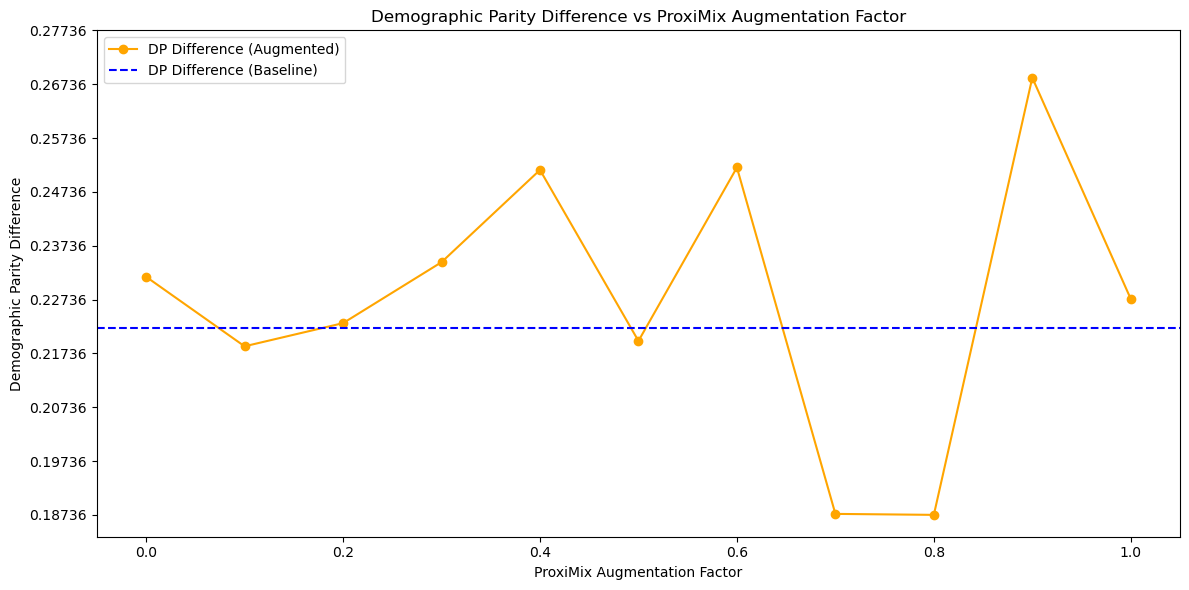

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import NearestNeighbors
from fairlearn.metrics import demographic_parity_difference
import matplotlib.pyplot as plt

# 设置全局随机种子
np.random.seed(42)

# ProxiMix 数据增强方法
def proxi_mix(X, y, k=3, d=1.0, factor=0.5, max_samples=None):
    nn = NearestNeighbors(n_neighbors=k+1)  # 找到 k+1 个邻居，其中第一个是样本自身
    nn.fit(X)
    distances, indices = nn.kneighbors(X)
    
    new_X = []
    new_y = []
    cnt = 0  # 初始化样本计数器
    
    # 动态调整最大生成样本数量
    if max_samples is None:
        max_samples = len(X)  # 如果未指定最大样本数，则默认为原始样本数量的一倍
    max_samples = max(1, int(max_samples * factor))  # 确保至少生成一个样本
    
    for i in range(len(X)):
        if cnt >= max_samples:  # 如果样本数量达到上限，提前停止
            break
        # 移除自身作为邻居（从第一个索引开始），所以从 indices[i][1:] 开始
        for j in range(1, k+1):  # 选择邻居，从 indices[i][1] 开始，跳过 indices[i][0] 即自身
            if cnt >= max_samples:  # 再次检查是否达到最大样本数
                break
            lam = np.random.beta(d, d)
            new_sample = lam * X[i] + (1 - lam) * X[indices[i][j]]
            new_label = int(round(lam * y[i] + (1 - lam) * y[indices[i][j]]))
            new_X.append(new_sample)
            new_y.append(new_label)
            cnt += 1  # 更新计数器
        if cnt >= max_samples:  # 再次检查是否达到最大样本数
            break
    
    return np.array(new_X), np.array(new_y)

# 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree']
target = 'two_year_recid'
compas_df = compas_df[features + [target]].dropna()

# 仅保留 "African-American" 和 "Caucasian" 的数据
compas_df = compas_df[compas_df['race'].isin(['African-American', 'Caucasian'])]

# 使两类数据量相同：下采样多的类别
min_count = compas_df['race'].value_counts().min()
compas_df_balanced = compas_df.groupby('race').sample(n=min_count, random_state=42)

# 类别特征编码为数值
compas_df_balanced = pd.get_dummies(compas_df_balanced, columns=['sex', 'race', 'c_charge_degree'], drop_first=True)

# 数据集拆分为训练集和测试集
X = compas_df_balanced.drop(columns=[target])
y = compas_df_balanced[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 设置随机种子

# 设置最大生成样本数：不超过原始数据集的一倍
max_generated_samples = len(X_train)

# 训练并评估基准模型（未使用 ProxiMix 增强）
clf_baseline = DecisionTreeClassifier(max_depth=6, random_state=42)  # 设置随机种子
clf_baseline.fit(X_train, y_train)
y_pred_baseline = clf_baseline.predict(X_test)

# 计算并打印基准模型的公平性指标
race_column = [col for col in X_test.columns if 'race_' in col][0]
dp_diff_baseline_value = demographic_parity_difference(y_test, y_pred_baseline, sensitive_features=X_test[race_column])

print(f"Demographic Parity Difference (Baseline): {dp_diff_baseline_value:.4f}")

# 记录不同 factor 下的 DP Difference
factors = []
dp_diff_augmented_list = []

# 循环 factor 从 0 到 1，间隔为 0.1
for factor in np.arange(0.0, 1.1, 0.1):
    print(f"\n--- Factor = {factor:.1f} ---")

    # 使用 ProxiMix 增强数据，限制最大生成样本数量
    X_new, y_new = proxi_mix(X_train.values, y_train.values, k=3, d=1.0, factor=factor, max_samples=max_generated_samples)
    
    # 检查是否生成了样本
    if X_new.size > 0:
        # 将原始训练集与增强样本合并
        augmented_X_train = pd.DataFrame(np.vstack([X_train.values, X_new]), columns=X_train.columns)
        augmented_y_train = pd.Series(np.hstack([y_train.values, y_new]))

        # 训练增强模型
        clf_augmented = DecisionTreeClassifier(max_depth=6, random_state=42)  # 设置随机种子
        clf_augmented.fit(augmented_X_train, augmented_y_train)

        # 预测并评估增强模型的公平性指标
        y_pred_augmented = clf_augmented.predict(X_test)

        dp_diff_augmented_value = demographic_parity_difference(y_test, y_pred_augmented, sensitive_features=X_test[race_column])

        # 保存数据
        factors.append(factor)
        dp_diff_augmented_list.append(dp_diff_augmented_value)

        print(f"Demographic Parity Difference (Augmented): {dp_diff_augmented_value:.4f}")
    else:
        print("No new samples were generated.")

# 绘制 Demographic Parity Difference 随 factor 变化的折线图
plt.figure(figsize=(12, 6))

# Demographic Parity Difference 曲线
plt.plot(factors, dp_diff_augmented_list, label='DP Difference (Augmented)', marker='o', color='orange')
plt.axhline(y=dp_diff_baseline_value, color='blue', linestyle='--', label='DP Difference (Baseline)')

# 设置纵坐标的刻度细化
plt.yticks(np.arange(min(dp_diff_augmented_list + [dp_diff_baseline_value]), max(dp_diff_augmented_list + [dp_diff_baseline_value]) + 0.01, 0.01))

plt.xlabel('ProxiMix Augmentation Factor')
plt.ylabel('Demographic Parity Difference')
plt.title('Demographic Parity Difference vs ProxiMix Augmentation Factor')
plt.legend()
plt.tight_layout()
plt.show()


Demographic Parity Difference (Baseline): 0.2220

--- Factor = 0.0 ---
Demographic Parity Difference (Augmented): 0.2316

--- Factor = 0.1 ---
Demographic Parity Difference (Augmented): 0.2187

--- Factor = 0.2 ---
Demographic Parity Difference (Augmented): 0.2230

--- Factor = 0.3 ---
Demographic Parity Difference (Augmented): 0.2343

--- Factor = 0.4 ---
Demographic Parity Difference (Augmented): 0.2514

--- Factor = 0.5 ---
Demographic Parity Difference (Augmented): 0.2197

--- Factor = 0.6 ---
Demographic Parity Difference (Augmented): 0.2519

--- Factor = 0.7 ---
Demographic Parity Difference (Augmented): 0.1875

--- Factor = 0.8 ---
Demographic Parity Difference (Augmented): 0.1874

--- Factor = 0.9 ---
Demographic Parity Difference (Augmented): 0.2686

--- Factor = 1.0 ---
Demographic Parity Difference (Augmented): 0.2275


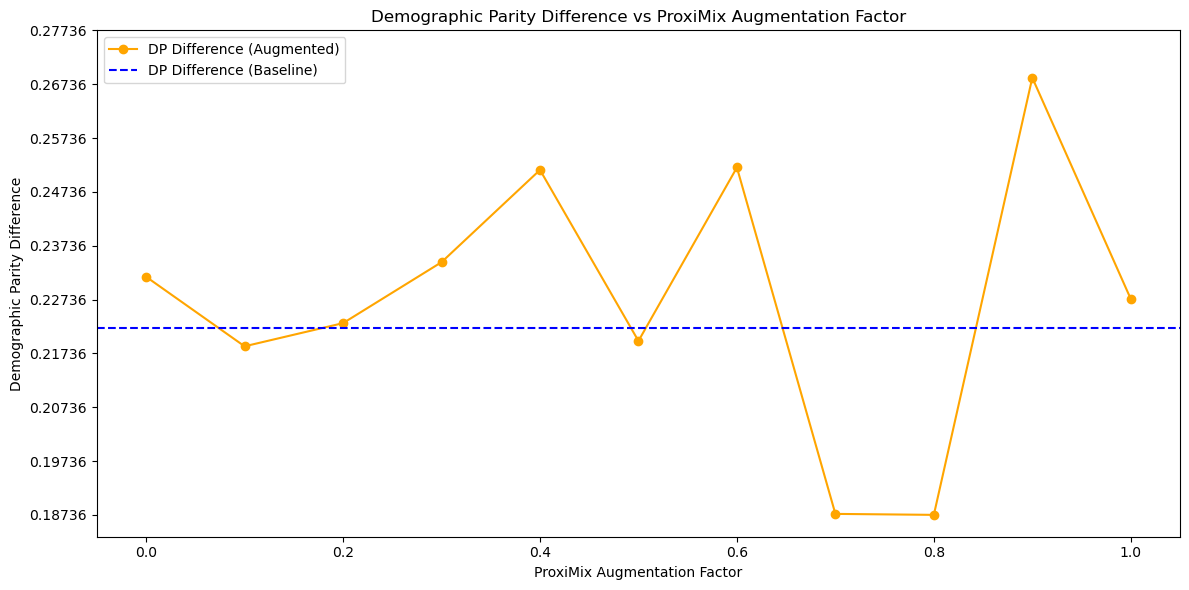

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import NearestNeighbors
from fairlearn.metrics import demographic_parity_difference
import matplotlib.pyplot as plt
import graphviz

# 设置全局随机种子
np.random.seed(42)

# ProxiMix 数据增强方法
def proxi_mix(X, y, k=3, d=1.0, factor=0.5, max_samples=None):
    nn = NearestNeighbors(n_neighbors=k+1)  # 找到 k+1 个邻居，其中第一个是样本自身
    nn.fit(X)
    distances, indices = nn.kneighbors(X)
    
    new_X = []
    new_y = []
    cnt = 0  # 初始化样本计数器
    
    # 动态调整最大生成样本数量
    if max_samples is None:
        max_samples = len(X)  # 如果未指定最大样本数，则默认为原始样本数量的一倍
    max_samples = max(1, int(max_samples * factor))  # 确保至少生成一个样本
    
    for i in range(len(X)):
        if cnt >= max_samples:  # 如果样本数量达到上限，提前停止
            break
        # 移除自身作为邻居（从第一个索引开始），所以从 indices[i][1:] 开始
        for j in range(1, k+1):  # 选择邻居，从 indices[i][1] 开始，跳过 indices[i][0] 即自身
            if cnt >= max_samples:  # 再次检查是否达到最大样本数
                break
            lam = np.random.beta(d, d)
            new_sample = lam * X[i] + (1 - lam) * X[indices[i][j]]
            new_label = int(round(lam * y[i] + (1 - lam) * y[indices[i][j]]))
            new_X.append(new_sample)
            new_y.append(new_label)
            cnt += 1  # 更新计数器
        if cnt >= max_samples:  # 再次检查是否达到最大样本数
            break
    
    return np.array(new_X), np.array(new_y)

# 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree']
target = 'two_year_recid'
compas_df = compas_df[features + [target]].dropna()

# 仅保留 "African-American" 和 "Caucasian" 的数据
compas_df = compas_df[compas_df['race'].isin(['African-American', 'Caucasian'])]

# 使两类数据量相同：下采样多的类别
min_count = compas_df['race'].value_counts().min()
compas_df_balanced = compas_df.groupby('race').sample(n=min_count, random_state=42)

# 类别特征编码为数值
compas_df_balanced = pd.get_dummies(compas_df_balanced, columns=['sex', 'race', 'c_charge_degree'], drop_first=True)

# 数据集拆分为训练集和测试集
X = compas_df_balanced.drop(columns=[target])
y = compas_df_balanced[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 设置随机种子

# 设置最大生成样本数：不超过原始数据集的一倍
max_generated_samples = len(X_train)

# 训练并评估基准模型（未使用 ProxiMix 增强）
clf_baseline = DecisionTreeClassifier(max_depth=6, random_state=42)  # 设置随机种子
clf_baseline.fit(X_train, y_train)
y_pred_baseline = clf_baseline.predict(X_test)

# 计算并打印基准模型的公平性指标
race_column = [col for col in X_test.columns if 'race_' in col][0]
dp_diff_baseline_value = demographic_parity_difference(y_test, y_pred_baseline, sensitive_features=X_test[race_column])

print(f"Demographic Parity Difference (Baseline): {dp_diff_baseline_value:.4f}")

# 记录不同 factor 下的 DP Difference
factors = []
dp_diff_augmented_list = []

# 循环 factor 从 0 到 1，间隔为 0.1
for factor in np.arange(0.0, 1.1, 0.1):
    print(f"\n--- Factor = {factor:.1f} ---")

    # 使用 ProxiMix 增强数据，限制最大生成样本数量
    X_new, y_new = proxi_mix(X_train.values, y_train.values, k=3, d=1.0, factor=factor, max_samples=max_generated_samples)
    
    # 检查是否生成了样本
    if X_new.size > 0:
        # 将原始训练集与增强样本合并
        augmented_X_train = pd.DataFrame(np.vstack([X_train.values, X_new]), columns=X_train.columns)
        augmented_y_train = pd.Series(np.hstack([y_train.values, y_new]))

        # 训练增强模型
        clf_augmented = DecisionTreeClassifier(max_depth=6, random_state=42)  # 设置随机种子
        clf_augmented.fit(augmented_X_train, augmented_y_train)

        # 预测并评估增强模型的公平性指标
        y_pred_augmented = clf_augmented.predict(X_test)

        dp_diff_augmented_value = demographic_parity_difference(y_test, y_pred_augmented, sensitive_features=X_test[race_column])

        # 保存数据
        factors.append(factor)
        dp_diff_augmented_list.append(dp_diff_augmented_value)

        print(f"Demographic Parity Difference (Augmented): {dp_diff_augmented_value:.4f}")

        # 如果 factor 为 0.8，绘制决策树图像
        if factor == 0.8:
            dot_data = export_graphviz(clf_augmented, out_file=None, 
                                       feature_names=augmented_X_train.columns,  
                                       class_names=['No Recid', 'Recid'],  
                                       filled=True, rounded=True,  
                                       special_characters=True)  
            graph = graphviz.Source(dot_data)  
            graph.render("compas_decision_tree_proximix_0.8")  # 将结果保存为文件
            graph.view()

# 绘制 Demographic Parity Difference 随 factor 变化的折线图
plt.figure(figsize=(12, 6))

# Demographic Parity Difference 曲线
plt.plot(factors, dp_diff_augmented_list, label='DP Difference (Augmented)', marker='o', color='orange')
plt.axhline(y=dp_diff_baseline_value, color='blue', linestyle='--', label='DP Difference (Baseline)')

# 设置纵坐标的刻度细化
plt.yticks(np.arange(min(dp_diff_augmented_list + [dp_diff_baseline_value]), max(dp_diff_augmented_list + [dp_diff_baseline_value]) + 0.01, 0.01))

plt.xlabel('ProxiMix Augmentation Factor')
plt.ylabel('Demographic Parity Difference')
plt.title('Demographic Parity Difference vs ProxiMix Augmentation Factor')
plt.legend()
plt.tight_layout()
plt.show()


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import dice_ml
from dice_ml import Dice

# 1. 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 2. 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# 删除缺失值
compas_df = compas_df.dropna()

# 将类别特征编码为数值
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['race'] = le.fit_transform(compas_df['race'])
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# 3. 将数据集拆分为特征和目标变量
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 初始化并训练决策树模型
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# 5. 使用 DiCE 生成对抗事实
# 初始化 DiCE 模型
continuous_features = ['age', 'juv_fel_count', 'juv_misd_count', 'priors_count']
categorical_features = ['sex', 'race', 'c_charge_degree']

dice_data = dice_ml.Data(dataframe=compas_df, continuous_features=continuous_features, categorical_features=categorical_features, outcome_name='two_year_recid')
dice_model = dice_ml.Model(model=clf, backend="sklearn", model_type='classifier')

# 使用 DiCE 生成对抗事实
dice = Dice(dice_data, dice_model)

# 选择一个测试样本生成对抗事实
test_sample = X_test.iloc[0].to_frame().T  # 选择第一个测试样本

# 生成对抗事实，允许所有特征变化
cf = dice.generate_counterfactuals(test_sample, total_CFs=5, desired_class="opposite")

# 显示对抗事实
cf_df = cf.visualize_as_dataframe()
print(cf_df)


  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/huashenglong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 34.73it/s]

Query instance (original outcome : 0)


,age,sex,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid
0,62,1,2,0,0,0,0,0



Diverse Counterfactual set (new outcome: 1)


,age,sex,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid
0,62,0,2,0,0,23,0,1
1,58,1,2,0,0,11,0,1
2,62,1,1,0,0,21,0,1
3,96,1,2,0,0,10,0,1
4,50,1,2,0,0,34,0,1


None


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import dice_ml
from dice_ml import Dice

# 1. 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 2. 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# 删除缺失值
compas_df = compas_df.dropna()

# 将类别特征编码为数值
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['race'] = le.fit_transform(compas_df['race'])
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# 3. 将数据集拆分为特征和目标变量
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 初始化并训练决策树模型
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# 5. 使用 DiCE 生成对抗事实
# 初始化 DiCE 模型
continuous_features = ['age', 'juv_fel_count', 'juv_misd_count', 'priors_count']
categorical_features = ['sex', 'race', 'c_charge_degree']

dice_data = dice_ml.Data(dataframe=compas_df, continuous_features=continuous_features, categorical_features=categorical_features, outcome_name='two_year_recid')
dice_model = dice_ml.Model(model=clf, backend="sklearn", model_type='classifier')

# 使用 DiCE 生成对抗事实
dice = Dice(dice_data, dice_model)

# 选择一个测试样本生成对抗事实
test_sample = X_test.iloc[0].to_frame().T  # 选择第一个测试样本

# 生成对抗事实，允许 'race', 'sex', 'age', 和 'priors_count' 变化
cf = dice.generate_counterfactuals(test_sample, total_CFs=5, features_to_vary=['race', 'sex', 'age', 'priors_count'], desired_class="opposite")

# 显示对抗事实
cf_df = cf.visualize_as_dataframe()
print(cf_df)


  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/huashenglong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 26.38it/s]

Query instance (original outcome : 0)


,age,sex,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid
0,62,1,2,0,0,0,0,0



Diverse Counterfactual set (new outcome: 1)


,age,sex,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid
0,60,1,2,0,0,15,0,1
1,53,1,2,0,0,21,0,1
2,35,1,2,0,0,33,0,1
3,57,1,2,0,0,11,0,1
4,24,1,2,0,0,36,0,1


None


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import dice_ml
from dice_ml import Dice

# 1. 加载 COMPAS 数据集
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"
compas_df = pd.read_csv(data_url)

# 2. 选择相关特征并保留 'two_year_recid' 作为目标变量
features = ['age', 'sex', 'race', 'juv_fel_count', 'juv_misd_count', 'priors_count', 'c_charge_degree', 'two_year_recid']
compas_df = compas_df[features]

# 删除缺失值
compas_df = compas_df.dropna()

# 将类别特征编码为数值
le = LabelEncoder()
compas_df['sex'] = le.fit_transform(compas_df['sex'])
compas_df['race'] = le.fit_transform(compas_df['race'])
compas_df['c_charge_degree'] = le.fit_transform(compas_df['c_charge_degree'])

# 3. 将数据集拆分为特征和目标变量
X = compas_df.drop(columns=['two_year_recid'])
y = compas_df['two_year_recid']

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. 初始化并训练决策树模型
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# 5. 使用 DiCE 生成对抗事实
# 初始化 DiCE 模型
continuous_features = ['age', 'juv_fel_count', 'juv_misd_count', 'priors_count']
categorical_features = ['sex', 'race', 'c_charge_degree']

dice_data = dice_ml.Data(dataframe=compas_df, continuous_features=continuous_features, categorical_features=categorical_features, outcome_name='two_year_recid')
dice_model = dice_ml.Model(model=clf, backend="sklearn", model_type='classifier')

# 使用 DiCE 生成对抗事实
dice = Dice(dice_data, dice_model)

# 选择一个测试样本生成对抗事实
test_sample = X_test.iloc[0].to_frame().T  # 选择第一个测试样本

# 生成对抗事实，允许 'race', 'sex', 'age', 'priors_count', 'c_charge_degree', 'juv_fel_count', 'juv_misd_count' 变化
cf = dice.generate_counterfactuals(
    test_sample, 
    total_CFs=5, 
    features_to_vary=['race', 'sex', 'age', 'priors_count', 'c_charge_degree', 'juv_fel_count', 'juv_misd_count'], 
    desired_class="opposite"
)

# 显示对抗事实
cf_df = cf.visualize_as_dataframe()
print(cf_df)


  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/huashenglong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 41.80it/s]

Query instance (original outcome : 0)


,age,sex,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid
0,62,1,2,0,0,0,0,0



Diverse Counterfactual set (new outcome: 1)


,age,sex,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid
0,94,1,2,0,0,19,0,1
1,46,1,2,0,0,26,0,1
2,22,1,4,0,0,0,0,1
3,62,0,2,0,0,23,0,1
4,18,1,1,0,0,0,0,1


None


In [100]:
# 选择一个年龄较小的测试样本
young_test_sample = X_test[X_test['age'] < 30].iloc[0].to_frame().T  # 选择年龄小于30的第一个样本

# 生成对抗事实，允许 'race', 'sex', 'age', 'priors_count', 'c_charge_degree', 'juv_fel_count', 'juv_misd_count' 变化
cf = dice.generate_counterfactuals(
    young_test_sample, 
    total_CFs=5, 
    features_to_vary=['race', 'sex', 'age', 'priors_count', 'c_charge_degree', 'juv_fel_count', 'juv_misd_count'], 
    desired_class="opposite"
)

# 显示对抗事实
cf_df = cf.visualize_as_dataframe()
print(cf_df)


  0%|                                                     | 0/1 [00:00<?, ?it/s]/Users/huashenglong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 15.30it/s]

Query instance (original outcome : 0)


,age,sex,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid
0,28,1,0,0,0,1,1,0



Diverse Counterfactual set (new outcome: 1)


,age,sex,race,juv_fel_count,juv_misd_count,priors_count,c_charge_degree,two_year_recid
0,28,1,0,0,13,25,1,1
1,28,1,2,0,0,5,1,1
2,28,1,0,0,0,22,1,1
3,90,1,0,0,0,1,1,1
4,28,1,0,0,0,19,1,1


None
